In [33]:
# For loading our dataset into environment
import pandas as pd
# For text preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Due to historical good performmance, SVC and GaussianNB are used
from sklearn.naive_bayes import BernoulliNB
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle
import re
from gensim.utils import simple_preprocess

### **WORDS SENTIMENT ANALYSIS**



1.   Project ini dibuat untuk meenganalisa sentimen dari setiap kalimat yang dimasukan. Ekspektasi yang diharapkan, program dapat berjalan dengan baik untuk menentukan kalimat yang dimasukan termasuk dalam katagori sentimen positif atau negatif
2.   Dataset : https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset?select=Tweets.csv



In [2]:
df = pd.read_csv("Tweets.csv")
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


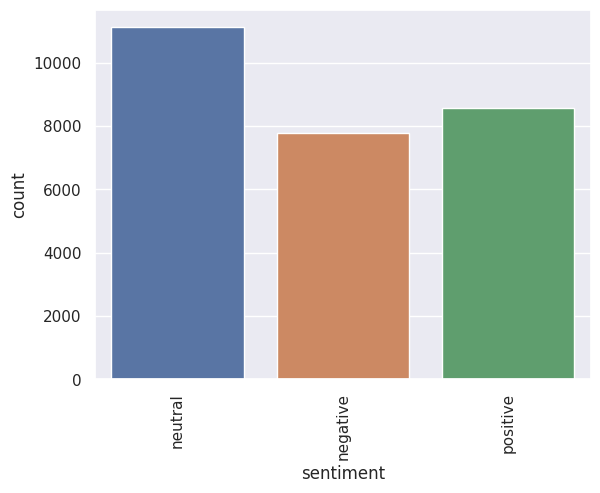

In [3]:
sns.countplot(data=df, x='sentiment')
plt.xticks(rotation = 90)
plt.show()

In [4]:
df = df.drop(df[df['sentiment'] == 'neutral'].index, axis = 0)
# Dropping irrelivant columns from the dataset
df.drop(['textID', 'selected_text'], axis = 1, inplace = True)


In [5]:
df.head(10)


,text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
6,2am feedings for the baby are fun when he is a...,positive
9,Journey!? Wow... u just became cooler. hehe....,positive
11,I really really like the song Love Story by Ta...,positive
12,My Sharpie is running DANGERously low on ink,negative
13,i want to go to music tonight but i lost my vo...,negative
15,"Uh oh, I am sunburned",negative


In [6]:
print(df.text[2])


my boss is bullying me...


In [7]:
def text_cleaner(texts):
    # removing url
    new_texts = [re.sub("http\S+", "", str(text)) for text in texts]
    # removing mentions
    new_texts = [re.sub("@\S+", "", text) for text in new_texts]
    # futher cleaning using gensim
    new_texts = [simple_preprocess(text, deacc=True) for text in new_texts]
    new_text_list = [' '.join(text) for text in new_texts]
    return new_text_list

In [8]:
# Original texts
for words in df.text[:10]:
    print(words)

 Sooo SAD I will miss you here in San Diego!!!
my boss is bullying me...
 what interview! leave me alone
 Sons of ****, why couldn`t they put them on the releases we already bought
2am feedings for the baby are fun when he is all smiles and coos
 Journey!? Wow... u just became cooler.  hehe... (is that possible!?)
I really really like the song Love Story by Taylor Swift
My Sharpie is running DANGERously low on ink
i want to go to music tonight but i lost my voice.
Uh oh, I am sunburned


In [9]:
# cleaned texts
new_listofwords = text_cleaner(df.text)
for words in new_listofwords[:10]:
    print(words)


sooo sad will miss you here in san diego
my boss is bullying me
what interview leave me alone
sons of why couldn they put them on the releases we already bought
am feedings for the baby are fun when he is all smiles and coos
journey wow just became cooler hehe is that possible
really really like the song love story by taylor swift
my sharpie is running dangerously low on ink
want to go to music tonight but lost my voice
uh oh am sunburned


In [10]:
# replacing the texts column in the dataframe with the cleaned one
df['text'] = new_listofwords
df.head(10)


,text,sentiment
1,sooo sad will miss you here in san diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative
4,sons of why couldn they put them on the releas...,negative
6,am feedings for the baby are fun when he is al...,positive
9,journey wow just became cooler hehe is that po...,positive
11,really really like the song love story by tayl...,positive
12,my sharpie is running dangerously low on ink,negative
13,want to go to music tonight but lost my voice,negative
15,uh oh am sunburned,negative


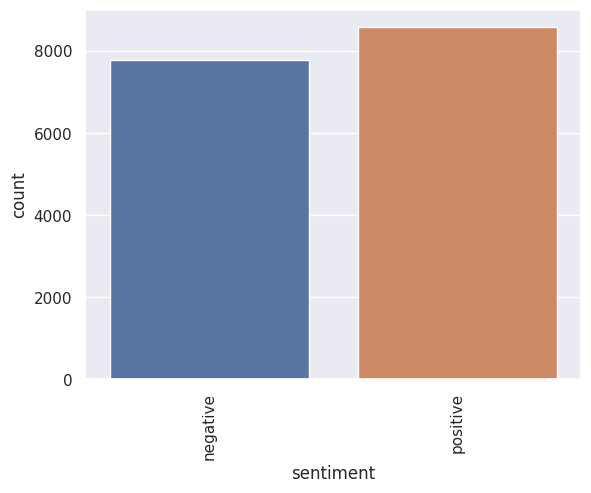

In [11]:
sns.countplot(data=df, x='sentiment')
plt.xticks(rotation = 90)
plt.show()

In [12]:
df.sentiment.unique()


array(['negative', 'positive'], dtype=object)

In [13]:
# Mapping the targets

df.sentiment = df.sentiment.map({
    'negative':0,
    'positive':1
})

In [14]:
df.head(10)

,text,sentiment
1,sooo sad will miss you here in san diego,0
2,my boss is bullying me,0
3,what interview leave me alone,0
4,sons of why couldn they put them on the releas...,0
6,am feedings for the baby are fun when he is al...,1
9,journey wow just became cooler hehe is that po...,1
11,really really like the song love story by tayl...,1
12,my sharpie is running dangerously low on ink,0
13,want to go to music tonight but lost my voice,0
15,uh oh am sunburned,0


WORD2VEC

In [15]:
# Split the dataset into dependent and independent variables
X = df.text.values
y = df.sentiment.values

In [16]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state = 10)
# Converting the words in integers
count_vec = CountVectorizer(lowercase=False, stop_words='english', max_features=3000)

In [17]:
X_train_count = count_vec.fit_transform(X_train)
X_test_count = count_vec.transform(X_test)
X_train_count = X_train_count.toarray()
X_test_count = X_test_count.toarray()

Menggunakan metode .CountVector

In [18]:
model = BernoulliNB()
model.fit(X_train_count, y_train)


BernoulliNB()

Evaluasi Model

In [19]:
from sklearn.metrics import classification_report, accuracy_score


In [20]:
model.score(X_train_count, y_train)


0.9007333682556312

In [21]:
pred = model.predict(X_test_count)
cR = classification_report(y_pred=pred, y_true=y_test)
print(cR)


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2334
           1       0.87      0.86      0.86      2575

    accuracy                           0.86      4909
   macro avg       0.85      0.86      0.85      4909
weighted avg       0.86      0.86      0.86      4909



In [22]:
aC = accuracy_score(y_pred=pred, y_true=y_test)
print(f"This model has an accuracy of {round(aC, 2) * 100}%")


This model has an accuracy of 86.0%


Menggunakan TF-IDF

In [23]:
# Converting the words in integers
tfidf_vec = TfidfVectorizer(max_features=3000, stop_words='english')

X_train_tfidf = tfidf_vec.fit_transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)


In [24]:
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

In [25]:
# Model
model2 = BernoulliNB()
model2.fit(X_train_tfidf, y_train)


BernoulliNB()

Evaluation

In [26]:
from sklearn.metrics import classification_report, accuracy_score


In [27]:
model2.score(X_train_tfidf, y_train)

0.9007333682556312

In [28]:
pred2 = model2.predict(X_test_tfidf)


In [29]:
cR2 = classification_report(y_pred=pred2, y_true=y_test)
print(cR2)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2334
           1       0.87      0.86      0.86      2575

    accuracy                           0.86      4909
   macro avg       0.85      0.86      0.85      4909
weighted avg       0.86      0.86      0.86      4909



In [30]:
aC2 = accuracy_score(y_pred=pred2, y_true=y_test)
print(f"This model has an accuracy of {round(aC2, 2) * 100}%")


This model has an accuracy of 86.0%


In [34]:
# This uses tfidf dictionary to convert word2vec
with open('./model&preprocessor/tfidf_dic.pkl', 'wb') as f:
    pickle.dump(tfidf_vec.vocabulary_, f)


In [35]:
# This is the classification model
with open('./model&preprocessor/text_classifier.pkl', 'wb') as f:
    pickle.dump(model2, f)
